In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import pandas as pd 
import os 
from tqdm import tqdm 

In [2]:
data_path = os.path.join(os.getcwd(), os.pardir, "data", "emerson", "emerson_processed")
whole_data_flag = False

In [3]:
if whole_data_flag:
    whole_data = pd.read_csv(os.path.join(data_path, "whole_seqs_nn.tsv"), sep = '\t')
    train_data = whole_data
else:
    train_data = pd.read_csv(os.path.join(data_path, "whole_seqs_nn_train.tsv"), sep = '\t')

In [4]:
len(train_data)

26427244

### V- and J-gene distribution

In [ ]:
v_genes = train_data.loc[:,"v"]
j_genes = train_data.loc[:,"j"]

In [ ]:
@numba.jit(forceobj=True)
def create_combinations(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append(f'{data[i, 3]}, {data[i, 6]}')
    return result 

In [ ]:
v_j_combinations = create_combinations(train_data.to_numpy())

In [ ]:
gene_count = {}
for comb in tqdm(v_j_combinations, total = train_data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in gene_count.keys():
        gene_count[key] = 1
    else:
        gene_count[key] += 1
gene_count.update((x, y/train_data.shape[0]) for x, y in gene_count.items())

In [ ]:
gene_count_sorted = dict(sorted(gene_count.items(), key = lambda x: x[1], reverse= True))

In [ ]:
sum(gene_count_sorted.values())


In [ ]:
fig = plt.figure(figsize=(50,50))
plt.bar(x=list(gene_count_sorted.keys()), height= list(gene_count_sorted.values()), align='edge')
plt.xticks(rotation=-90)
plt.show

In [ ]:
indx = int(len(gene_count_sorted)/7)

In [ ]:
def gene_combination(begin_indx, end_indx):
    print(pd.DataFrame(data={'gene combination': list(gene_count_sorted.keys())[begin_indx:end_indx], 'fraction (%)': [f'{i*100:.3}'for i in list(gene_count_sorted.values())[begin_indx:end_indx]]}).to_latex(index=False))

In [ ]:
gene_combination(0, indx)
gene_combination(indx, 2*indx)
gene_combination(2*indx, 3*indx)
gene_combination(3*indx, 4*indx)
gene_combination(4*indx, 5*indx)
gene_combination(5*indx, 6*indx)
gene_combination(6*indx, len(gene_count_sorted))

### distribution of deletions of v gene  

In [ ]:
v_deletions= train_data.loc[:,"v_deletions"]
j_deletions = train_data.loc[:,"j_deletions"]

In [ ]:
v_deletion_count = {}
for comb in tqdm(v_deletions, total = train_data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in v_deletion_count.keys():
        v_deletion_count[key] = 1
    else:
        v_deletion_count[key] += 1
v_deletion_count.update((x, y/train_data.shape[0]) for x, y in v_deletion_count.items())

In [ ]:
v_deletion_count_sorted = dict(sorted(v_deletion_count.items(), key= lambda x: x[1], reverse=True))
v_deletion_count_sorted

In [ ]:
sum(list(v_deletion_count_sorted.values()))

In [ ]:
print(pd.DataFrame(data={'number of deletions': list(v_deletion_count_sorted.keys()), 'fraction (%)': [f'{i *100:.3}' for i in v_deletion_count_sorted.values()]}).to_latex(index=False))

In [ ]:
sum(list(v_deletion_count_sorted.values())[:11])

In [ ]:
list(v_deletion_count_sorted.keys())[:11]

In [ ]:
v_deletion_count_sorted = {int(k):v for k,v in v_deletion_count_sorted.items()}
v_deletion_count_sorted = dict(sorted(v_deletion_count_sorted.items(), reverse=False))

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(v_deletion_count_sorted.keys(), v_deletion_count_sorted.values())
plt.title("Deletions on V gene")
plt.xlabel("No. of deletions")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures", "V_deletion_train.png"))

### distribution of deletions on J - genes  

In [ ]:
j_deletion_count = {}
for comb in tqdm(j_deletions, total = train_data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in j_deletion_count.keys():
        j_deletion_count[key] = 1
    else:
        j_deletion_count[key] += 1
j_deletion_count.update((x, y/train_data.shape[0]) for x, y in j_deletion_count.items())

In [ ]:
j_deletion_count_sorted = dict(sorted(j_deletion_count.items(), key= lambda x: x[1], reverse=True))
j_deletion_count_sorted

In [ ]:
print(pd.DataFrame(data={'number of deletions': list(j_deletion_count_sorted.keys()), 'fraction (%)': [f'{i *100:.3}' for i in j_deletion_count_sorted.values()]}).to_latex(index=False))

In [ ]:
sum(list(j_deletion_count_sorted.values())[:12])

In [ ]:
list(j_deletion_count_sorted.keys())[:12]

In [ ]:
j_deletion_count_sorted = {int(k):v for k,v in j_deletion_count_sorted.items()}
j_deletion_count_sorted = dict(sorted(j_deletion_count_sorted.items(), reverse=False))

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(j_deletion_count_sorted.keys(), j_deletion_count_sorted.values())
plt.title("Deletions on J gene")
plt.xlabel("No. of deletions")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures", "J_deletion_train.png"))

### Distribution of Lengths of cdr3 sequences 

In [ ]:
cdr3 = train_data.loc[:, 'seq']

In [ ]:
@numba.jit(forceobj=True)
def count_seq_len(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append(len(data[i]))
    return result

In [ ]:
cdr3_lengths = count_seq_len(cdr3.to_numpy())

In [ ]:
cdr3_len_count = {}
for len_ in tqdm(cdr3_lengths, total = train_data.shape[0], position=0, leave=True):
    key = str(len_)
    if key not in cdr3_len_count.keys():
        cdr3_len_count[key] = 1
    else:
        cdr3_len_count[key] += 1
cdr3_len_count.update((x, y/train_data.shape[0]) for x, y in cdr3_len_count.items())

In [ ]:
cdr3_len_count

In [ ]:
sum(list(cdr3_len_count.values()))

In [ ]:
sorted_cdr3_len = dict(sorted(cdr3_len_count.items(), key = lambda x: x[1], reverse = True))

In [ ]:
sum(list(sorted_cdr3_len.values())[:9])

In [ ]:
list(sorted_cdr3_len.keys())[:9]

In [ ]:
print(pd.DataFrame(data={'len of cdr3': sorted_cdr3_len.keys(), 'fraction (%)': [f'{i*100:.3}'for i in sorted_cdr3_len.values()]}).to_latex(index=False))

In [ ]:
sorted_cdr3_len = {int(k):v for k,v in sorted_cdr3_len.items()}
sorted_cdr3_len= dict(sorted(sorted_cdr3_len.items(), reverse=False))

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(sorted_cdr3_len.keys(), sorted_cdr3_len.values())
plt.title("Lengths of CDR3 sequences")
plt.xlabel("Length of CDR3 seq")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures","CDR3_train.png"))

### Specific V gene deletions 

In [5]:
v_genes_deletions = train_data.loc[:,['v', 'v_deletions']]

In [14]:
@numba.jit(forceobj=True)
def create_list(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append((data[i, 0], data[i, 1]))
    return result 

In [7]:
v_genes_deletions

,v,v_deletions
0,TRBV11-2,6
1,TRBV7-8,5
2,TRBV11-2,5
3,TRBV4-2,4
4,TRBV7-2,1
...,...,...
26427239,TRBV5-4,0
26427240,TRBV5-4,4
26427241,TRBV29-1,6
26427242,TRBV4-2,3


In [15]:
v_genes_deletions_list = create_list(v_genes_deletions.to_numpy())

100%|██████████| 26427244/26427244 [00:14<00:00, 1850502.97it/s]


In [36]:
gene_deletion_list = {}
for i in tqdm(v_genes_deletions_list, total = train_data.shape[0], position=0, leave=True):
    key = str(i[0])
    value = i[1]
    if key not in gene_deletion_list.keys():
        gene_deletion_list[key] = [value]
    else:
        gene_deletion_list[key].append(value)
#gene_count.update((x, y/train_data.shape[0]) for x, y in gene_count.items())

100%|██████████| 26427244/26427244 [00:14<00:00, 1830234.65it/s]


In [52]:
v_gene_deletions = {}
for i in tqdm(gene_deletion_list.keys(), total = len(gene_deletion_list), position = 0, leave = True):
    gene_count = {}
    total = 0
    for j in gene_deletion_list[i]:
        key = str(j)
        if key not in gene_count.keys():
            gene_count[key] = 1
        else:
            gene_count[key] += 1
        total += 1
    gene_count.update((x, y/total) for x, y in gene_count.items())
    v_gene_deletions[i] = gene_count

100%|██████████| 28/28 [00:11<00:00,  2.36it/s]


In [57]:
trbv112 = v_gene_deletions['TRBV11-2']

In [58]:
trbv112 = {int(k): v for k,v in trbv112.items()}
trbv112 = dict(sorted(trbv112.items()))
trbv112

{0: 0.10246597858625187,
 1: 0.1634565940019467,
 2: 0.0933775320930745,
 3: 0.112136752921587,
 4: 0.11934047737109205,
 5: 0.2780749358750681,
 6: 0.0668108329813349,
 7: 0.030956731740463903,
 8: 0.0216769817511769,
 9: 0.0034113239426273164,
 10: 0.004691526938593108,
 11: 0.0026476403861575852,
 12: 0.0006014581917687462,
 13: 0.00019283392407852933,
 14: 0.00011019081375915961,
 15: 4.361719711300068e-05,
 16: 7.652139844386084e-07,
 18: 7.652139844386084e-07,
 21: 7.652139844386084e-07,
 22: 7.652139844386084e-07,
 25: 1.5304279688772168e-06}

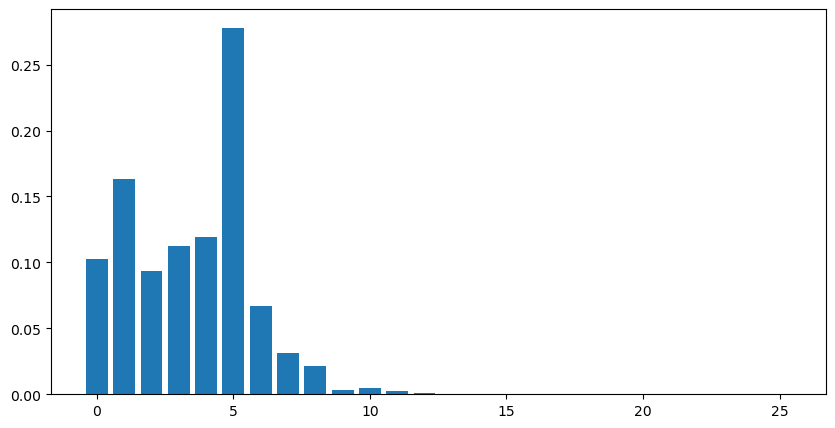

In [59]:
fig = plt.figure(figsize = (10,5))
plt.bar(trbv112.keys(), trbv112.values())
plt.show()